In [1]:
import torch
from torch.autograd import Variable
from torch.nn import Parameter
from torch.utils.data import DataLoader

from torchvision.datasets import mnist

from torch import nn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os,time

In [2]:
train_set=mnist.MNIST('./data/',train=True,download=True)
test_set=mnist.MNIST('./data/',train=False,download=True)

In [3]:
def data_df(x):
    x=np.array(x)/255
    x=(x-0.5)/0.5
    x=x.reshape((-1,))
    x=torch.Tensor(x).float()
    return x

In [4]:
train_set=mnist.MNIST('./data/',train=True,transform=data_df)
test_set=mnist.MNIST('./data/',train=False,transform=data_df)

In [5]:
train_data=DataLoader(train_set,batch_size=64,shuffle=True)
test_data=DataLoader(test_set,batch_size=128,shuffle=False)

In [6]:

net=nn.Sequential(
    nn.Linear(784,400),
    nn.ReLU(),
    nn.Linear(400,200),
    nn.ReLU(),
    nn.Linear(200,100),
    nn.ReLU(),
    nn.Linear(100,10)
)

In [7]:
criterion=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(net.parameters(),lr=.1)

In [8]:
losses=[]
acces=[]
eval_losses=[]
eval_acces=[]

for i in range(10):
    train_loss=0
    train_acc=0
    net.train()
    
    for im,label in train_data:
        out=net(im)
        loss=criterion(out,label)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        train_loss+=loss.data.numpy()
        _,pred=out.max(1)
        acc=(pred==label).float().sum()/im.shape[0]
        train_acc+=acc
    losses.append(train_loss)
    acces.append(train_acc/len(train_data))
    
    eval_loss=0
    eval_acc=0
    net.eval()
    
    for im,label in test_data:
        out=net(im)
        loss=criterion(out,label)
        
        eval_loss+=loss.data.numpy()
        
        _,pred=out.max(1)
        acc=(pred==label).float().sum()/im.shape[0]
        eval_acc+=acc
        
    eval_losses.append(eval_loss/len(test_data))
    eval_acces.append(eval_acc/len(test_data))
    
    print('epoch:{} train_loss:{} test_loss:{} train_acc:{} test_acc:{}'.format(i+1,train_loss/len(train_data),eval_loss/len(test_data),train_acc/len(train_data),eval_acc/len(test_data)))

epoch:1 train_loss:0.5078168632164757 test_loss:0.2287351920776352 train_acc:0.836670458316803 test_acc:0.9268196225166321
epoch:2 train_loss:0.1662996712643137 test_loss:0.12656787672091888 train_acc:0.9487939476966858 test_acc:0.9608386158943176
epoch:3 train_loss:0.11727747759287323 test_loss:0.15746043316866684 train_acc:0.9635527729988098 test_acc:0.949070394039154
epoch:4 train_loss:0.09249601354087784 test_loss:0.10087937856523344 train_acc:0.9709154963493347 test_acc:0.9679588675498962
epoch:5 train_loss:0.09271469342334669 test_loss:0.10606335951722687 train_acc:0.9727811813354492 test_acc:0.9663766026496887
epoch:6 train_loss:0.07201637245460486 test_loss:0.07804136016904199 train_acc:0.9770122766494751 test_acc:0.975969135761261
epoch:7 train_loss:0.05772895310736839 test_loss:0.07424604913213916 train_acc:0.9818763136863708 test_acc:0.977749228477478
epoch:8 train_loss:0.04711692841324671 test_loss:0.07555791345105177 train_acc:0.9847581386566162 test_acc:0.9772547483444214

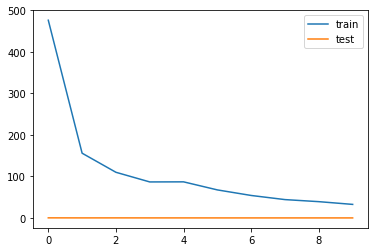

In [9]:
plt.plot(losses,label='train')
plt.plot(eval_losses,label='test')
plt.legend()

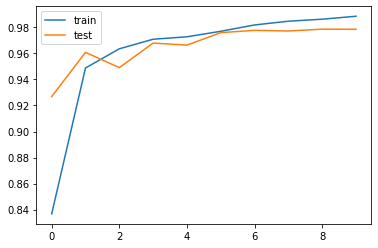

In [10]:
plt.plot(acces,label='train')
plt.plot(eval_acces,label='test')
plt.legend()

In [12]:
print(eval_losses)
print(eval_acces)

[0.2287351920776352, 0.12656787672091888, 0.15746043316866684, 0.10087937856523344, 0.10606335951722687, 0.07804136016904199, 0.07424604913213916, 0.07555791345105177, 0.0726023203376688, 0.0700073879557703]
[tensor(0.9268), tensor(0.9608), tensor(0.9491), tensor(0.9680), tensor(0.9664), tensor(0.9760), tensor(0.9777), tensor(0.9773), tensor(0.9786), tensor(0.9785)]
